In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# To load the environment variable defined in the .env file
from dotenv import load_dotenv
load_dotenv();

In [3]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as mtick

from sklearn.calibration import CalibrationDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

import src.visualization.visualize as VizManager
import src.features.build_features as FeaturesManager

In [4]:
seasons_year = [2016, 2017, 2018, 2019]
season_type = "Regular"
features_data = FeaturesManager.build_features(seasons_year, season_type)

# We take the absolute value, for symmetry reasons
features_data['Shot angle'] = features_data['Shot angle'].abs()
features_data.sample(10)

,Game ID,Event Index,Period,Team,Type,Shot Type,Shooter,Goalie,Strength,X,...,Last event st_Y,Shot distance,Shot angle,Is Goal,Is Empty,Game seconds,Last event angle,Rebound,Change in Shot Angle,Speed From Previous Event
22109,2016020364,316,4,Washington Capitals (WSH),SHOT,Wrist Shot,Alex Ovechkin,Ben Bishop,NaN,60.0,...,8.0,31.016125,20.772255,0,0,3846,3.115065,1,23.887319,11.951987
208988,2018020895,240,3,Tampa Bay Lightning (TBL),SHOT,Slap Shot,Yanni Gourde,Carey Price,NaN,69.0,...,-11.0,26.907248,41.987212,0,0,2995,-5.762633,0,0.000000,1.014487
172541,2018020297,147,2,Columbus Blue Jackets (CBJ),GOAL,Snap Shot,Zach Werenski,Scott Darling,Even,-44.0,...,-39.0,45.099889,3.814075,1,0,1642,-12.633362,0,0.000000,9.566363
237425,2019020088,147,2,Calgary Flames (CGY),SHOT,Wrist Shot,Johnny Gaudreau,Brian Elliott,NaN,79.0,...,-18.0,26.000000,67.380135,0,0,1761,-7.174324,0,0.000000,15.497112
57100,2016020938,397,5,Florida Panthers (FLA),SHOT,Wrist Shot,Jonathan Huberdeau,Steve Mason,NaN,80.0,...,9.0,15.000000,53.130102,0,0,3900,3.160362,0,0.000000,inf
55111,2016020907,78,1,Montréal Canadiens (MTL),SHOT,Snap Shot,Shea Weber,Frederik Andersen,NaN,59.0,...,17.0,47.634021,50.964487,0,0,846,5.336320,0,0.000000,5.475362
293990,2019021015,126,2,Anaheim Ducks (ANA),SHOT,Snap Shot,Nicolas Deslauriers,Cory Schneider,NaN,-75.0,...,18.0,20.518285,46.974934,0,0,1474,46.636577,1,93.611511,33.136083
84986,2017020161,271,3,Arizona Coyotes (ARI),SHOT,Snap Shot,Derek Stepan,Cory Schneider,NaN,-76.0,...,-7.0,19.104973,47.121096,0,0,3124,-30.256437,1,77.377534,1.051190
26628,2016020439,244,3,Dallas Stars (DAL),GOAL,Backhand,Adam Cracknell,John Gibson,Even,-85.0,...,-41.0,8.062258,60.255119,1,0,2793,-18.024724,0,0.000000,5.462626
167177,2018020211,129,2,New York Islanders (NYI),SHOT,Slap Shot,Mathew Barzal,Antti Niemi,NaN,-59.0,...,18.0,36.055513,33.690068,0,0,1579,6.709837,1,26.980231,10.251355


In [5]:
distance_data = features_data[['Shot distance', 'Is Goal']].dropna()
X = distance_data['Shot distance'].to_numpy().reshape(-1, 1)
y = distance_data['Is Goal'].to_numpy()

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [8]:
accuracy = clf.score(X_valid, y_valid)
print(f'Accuracy on validation set = {np.around(100.*accuracy, 2)}%')

Accuracy on validation set = 90.75%


0.9075036897893466
Dumb Accuracy on validation set = 90.75%


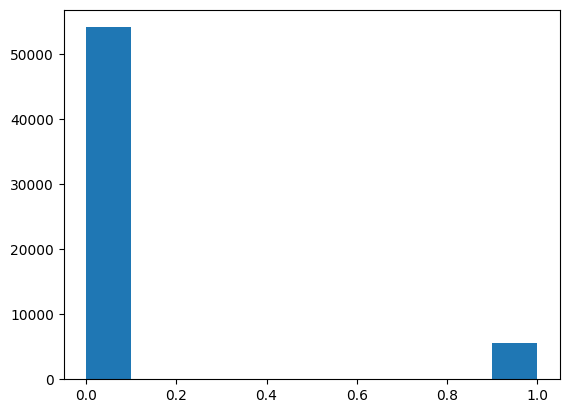

In [9]:
# Accuracy is not the right metric to use, as the classes are unbalanced
num_goals = (y_valid==1).sum()
num_no_goals = (y_valid==0).sum()
print(num_no_goals / (num_no_goals+num_goals))
plt.hist(y_valid);

# A dumb model that predicts 0 (no goals) all the time reach the same level of performance
def dumb_model(X, y):
    pred = np.zeros_like(X)
    return (y == pred).mean()


dumb_accuracy = dumb_model(X_valid, y_valid)
print(f'Dumb Accuracy on validation set = {np.around(100.*dumb_accuracy, 2)}%')

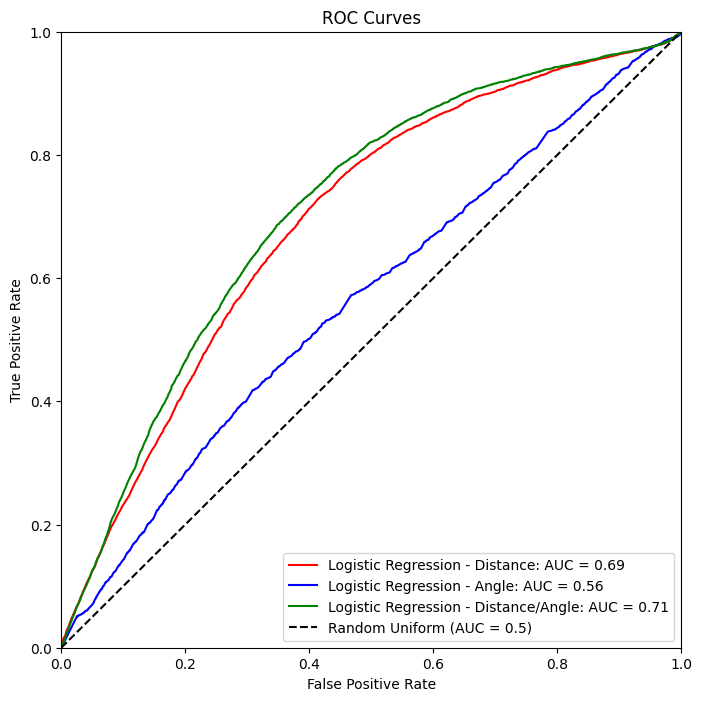

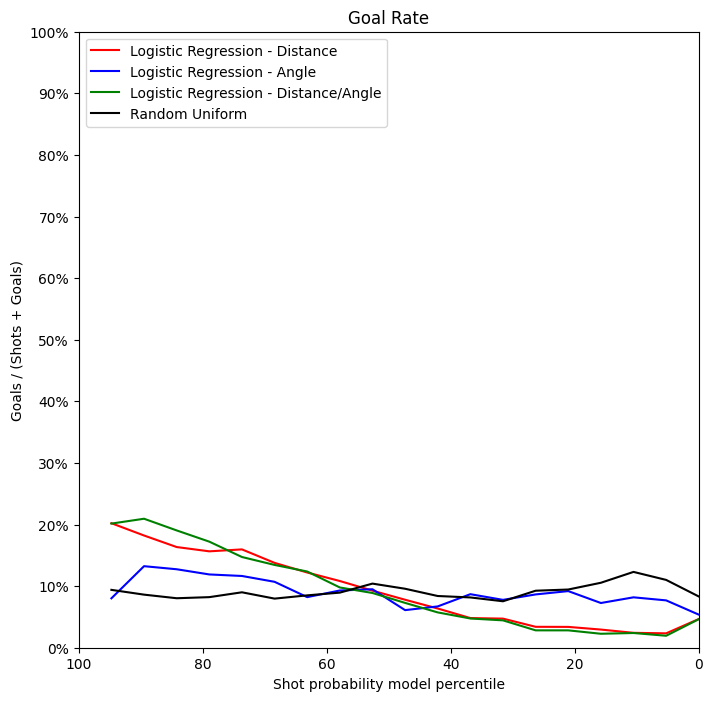

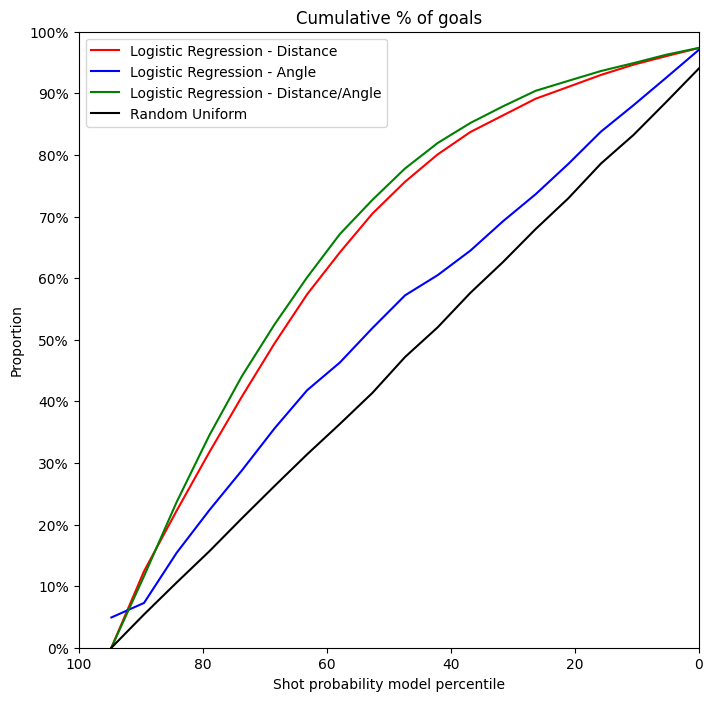

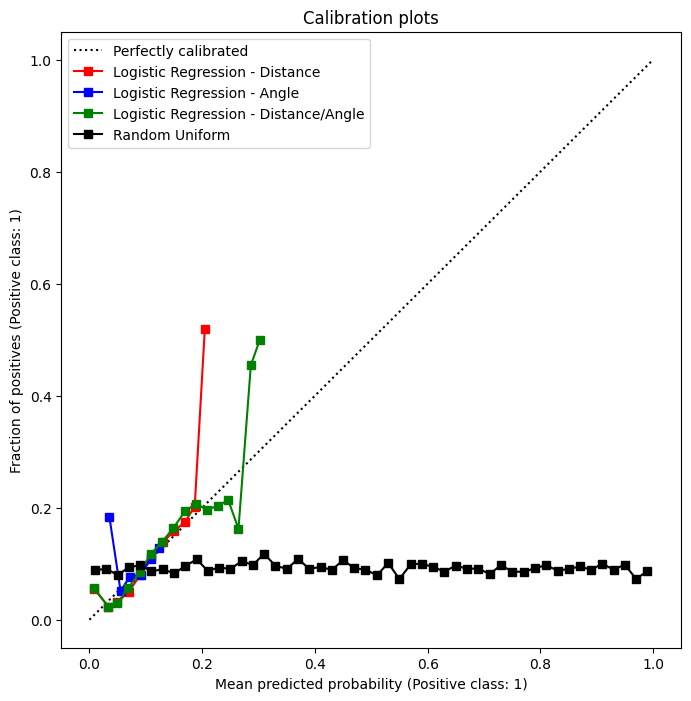

In [50]:
distance_data = features_data[['Shot distance', 'Shot angle', 'Is Goal']].dropna()
X = distance_data[['Shot distance', 'Shot angle']].to_numpy().reshape(-1, 2)
y = distance_data['Is Goal'].to_numpy()

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


# Logistic Regression - Distance only
X_distance_train, X_distance_valid = X_train[:,0].reshape(-1, 1), X_valid[:,0].reshape(-1, 1)
clf_distance = LogisticRegression(random_state=0).fit(X_distance_train, y_train)


# Logistic Regression - Angle only
X_angle_train, X_angle_valid = X_train[:,1].reshape(-1, 1), X_valid[:,1].reshape(-1, 1)
clf_angle = LogisticRegression(random_state=0).fit(X_angle_train, y_train)

# Logistic Regression - Distance and Angle
X_distance_angle_train, X_distance_angle_valid = X_train, X_valid
clf_distance_angle = LogisticRegression(random_state=0).fit(X_distance_angle_train, y_train)

classifiers = [(clf_distance, 'Logistic Regression - Distance', X_distance_valid, y_valid),
               (clf_angle, 'Logistic Regression - Angle', X_angle_valid, y_valid),
               (clf_distance_angle, 'Logistic Regression - Distance/Angle', X_distance_angle_valid, y_valid) ]


VizManager.plot_all_figures(classifiers, add_random=True)
